In [7]:
import networkx as nx
import numpy as np
import joblib
import h5py

import matplotlib.pyplot as plt
from matplotlib import pylab

import seaborn as sns

from tqdm import tqdm

from src.interact_with_matrices import find_degree_for_word, open_object
from src.matrix_reduce import reduce_dimension_adjacency_matrix

# Loading data

In [8]:
degree_matrix = open_object('data/degree_matrix.hdf5')
adjacency_matrix = open_object('data/adjacency_matrix.hdf5')

french_degree_matrix = open_object('data/french_degree_matrix.hdf5')
french_adjacency_matrix = open_object('data/french_adjacency_matrix.hdf5')

with open('data/keys.pkl', 'rb') as infile:
    keys = joblib.load(infile)
    
with open('data/french_keys.pkl', 'rb') as infile:
    french_keys = joblib.load(infile)

# Degree distribution

Text(0.5,0.98,'Degree distribution')

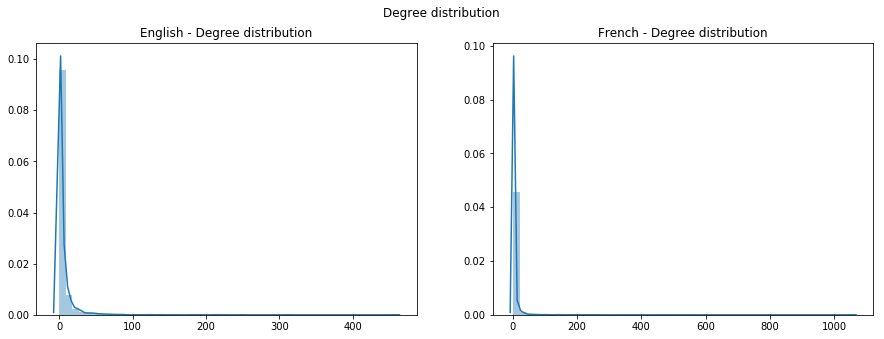

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(np.diag(degree_matrix), ax=ax[0])
ax[0].set_title('English - Degree distribution')

sns.distplot(np.diag(french_degree_matrix), ax=ax[1])
ax[1].set_title('French - Degree distribution')

fig.suptitle('Degree distribution')

# Threshold vs count

In [10]:
x = range(31)
y_english = []
y_french = []

In [11]:
for i in tqdm(x, total=len(x)):
    tmp, _, _ = reduce_dimension_adjacency_matrix(
        adjacency_matrix,
        degree_matrix, 
        keys,
        threshold=i
    )
    
    tmp2, _, _ = reduce_dimension_adjacency_matrix(
        french_adjacency_matrix,
        french_degree_matrix, 
        french_keys,
        threshold=i
    )
    
    y_english.append(tmp.shape[0])
    y_french.append(tmp2.shape[0])

100%|██████████| 31/31 [01:27<00:00,  2.82s/it]


Text(0.5,0.98,'Threshold vs number of nodes')

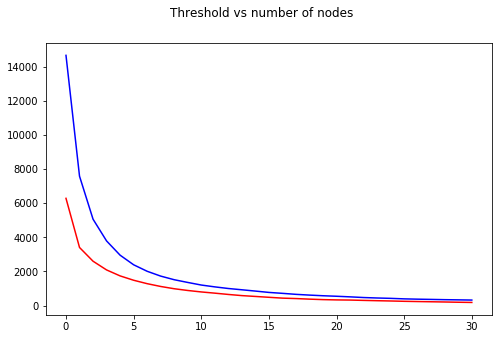

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(x, y_english, c='r')
ax.plot(x, y_french, c='b')

fig.suptitle('Threshold vs number of nodes')